In [1]:
import torch

In [2]:
pipeline = {1 : "data (preprocessing)",
            2 : "build model",
            3 : "fitting the data to model",
            4:"making predictions and evaluating the model",
            5 : "saving the model",
            6:"putting it all together"}

In [3]:
pipeline

{1: 'data (preprocessing)',
 2: 'build model',
 3: 'fitting the data to model',
 4: 'making predictions and evaluating the model',
 5: 'saving the model',
 6: 'putting it all together'}

In [5]:
import torch.nn as nn  # contains all pytorch's building blocks
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu117'

# DATA PREPARING AND LOADING

image

video

dna

txt

csv spreadsheets

audio

In [6]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)

y = weight * X + bias

X[:10] , y[:10] , len(X) , len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

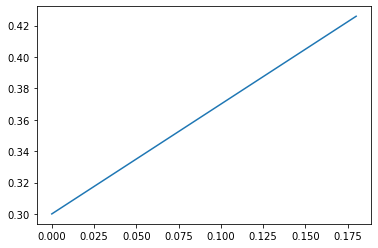

In [7]:
plt.plot(X[:10],y[:10])

In [13]:
%%time
train_split = int(0.8*len(X))

X_train , y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]

CPU times: user 59 µs, sys: 23 µs, total: 82 µs
Wall time: 83.7 µs


CPU times: user 16.1 ms, sys: 525 µs, total: 16.6 ms
Wall time: 12.2 ms


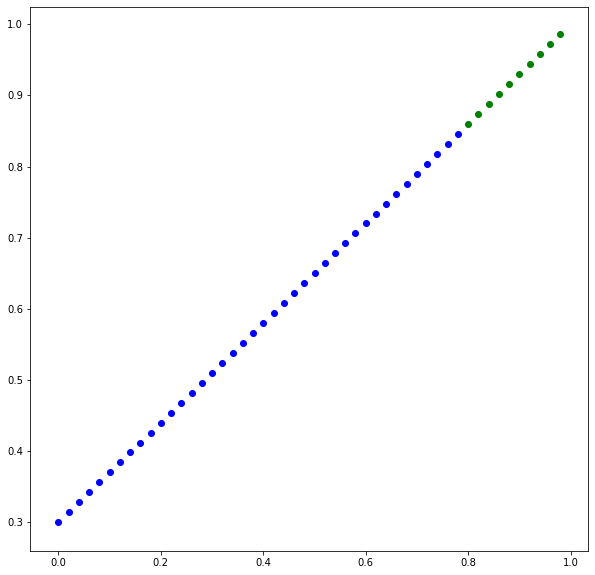

In [12]:
%%time
def predictionss(train_data,train_labels,test_data,test_labels,predictions = None):
    plt.figure(figsize=(10,10))
    plt.scatter(train_data,train_labels,c ="b",label = "Training data")
    plt.scatter(test_data,test_labels,c ="g",label = "Test data")
    if predictions is not None:
        plt.scatter(test_data,predictions,c ="r",label = "predictions")
        
predictionss(X_train,y_train,X_test,y_test)

start with random values 

look at trianing values and adjust the parameters accordingly to get closer to ideal weights and bias


by gradient descent 
   back propagation


requires _grad = true 

pytorch will track the gradients of the specific parameters for use with torch.autograd and gradient descent for many torch.nn modules it is set by default true

it will remember the differentiation operations and through back propagation it updates weights and bias

The call to super().__init__() inside the __init__ method is used to ensure that the initialization defined in the parent class (if any) is executed before the specific initialization of the subclass. This way, the subclass can benefit from the attributes and behavior defined in the parent class.

In [14]:
class LinearregressionModel(nn.Module):  # almost everything inherits from pytorch
    # base class for all neural network models
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
    def forward(self,  x : torch.Tensor) -> torch.Tensor:  # x is the innput data for the model 
        return self.weights*x + self.bias 
        
        
        # any subclass of forward function overrides the forward function in nn module 
        

Computational graphs are also called has neural networks

nn.parameter is also a torch layer

nn.Parameter is a specific class in PyTorch's torch.nn module used for defining learnable parameters within neural network models.
When you use nn.Parameter, you are explicitly declaring that the tensor is a model parameter, and it will be registered as part of the model's parameters. These parameters are the ones that will be updated during the training process when gradients are calculated and backpropagation is performed.
In this case, torch.rand(1) generates a random tensor of shape (1,) with values between 0 and 1. Since it is wrapped in nn.Parameter, it becomes a learnable parameter of the model with requires_grad set to True, meaning it will be optimized during training.
nn.Parameter objects are often used when you define custom neural network models and want to manually specify some of the model's parameters.

In [15]:
# torch.optim